**Финальный проект**

**Назирзода Рахимджон**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('GlobalWeatherRepository.csv')

## Знакомство с данными

In [106]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       46967 non-null  object 
 1   location_name                 46967 non-null  object 
 2   latitude                      46967 non-null  float64
 3   longitude                     46967 non-null  float64
 4   timezone                      46967 non-null  object 
 5   last_updated_epoch            46967 non-null  int64  
 6   last_updated                  46967 non-null  object 
 7   temperature_celsius           46967 non-null  float64
 8   temperature_fahrenheit        46967 non-null  float64
 9   condition_text                46967 non-null  object 
 10  wind_mph                      46967 non-null  float64
 11  wind_kph                      46967 non-null  float64
 12  wind_degree                   46967 non-null  int64  
 13  w

In [108]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,46967.000000,46967.000000,4.696700e+04,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,...,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000
mean,19.143160,22.210006,1.726313e+09,23.269102,73.885805,8.306815,13.372474,171.392978,1013.613899,29.931414,...,19.348006,511.616258,62.774014,13.678933,10.301289,23.021114,45.306193,1.631486,2.461409,48.643580
std,24.482211,65.783329,6.087832e+06,8.997838,16.196058,10.006371,16.102573,102.974994,6.997895,0.206537,...,17.766285,999.447249,38.032385,25.423819,52.329466,45.825141,137.362847,0.949271,2.429694,34.914705
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.720963e+09,18.500000,65.300000,4.000000,6.500000,84.000000,1010.000000,29.830000,...,10.800000,217.000000,37.000000,0.800000,0.700000,4.600000,7.400000,1.000000,1.000000,14.000000
50%,17.250000,23.320000,1.726402e+09,25.400000,77.700000,6.900000,11.200000,165.000000,1013.000000,29.910000,...,17.000000,307.100000,59.000000,2.900000,2.035000,11.655000,18.300000,1.000000,1.000000,48.000000
75%,40.400000,50.580000,1.731576e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.800000,468.050000,83.700000,13.690000,7.585000,25.700000,41.255000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.736768e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [109]:
categor_columns = df.select_dtypes(include=['object']).columns.tolist()

categor_columns

['country',
 'location_name',
 'timezone',
 'last_updated',
 'condition_text',
 'wind_direction',
 'sunrise',
 'sunset',
 'moonrise',
 'moonset',
 'moon_phase']

Данная база данных была  получена с открытого источника база данных 'kaggle'. Ссылка набор данных: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data?select=GlobalWeatherRepository.csv

Цель анализа состоит в том, чтобы изучить погодные условия в различных городах и странах. В рамках анализа будут исследованы такие параметры, как температура воздуха, скорость ветра, влажность, качество воздуха, а также время восхода и заката солнца. Это позволит получить общее представление о климатических условиях в данных местах.

'Country' - Название страны, к которой относится запись (данные), категориальный (object)

'Location_name' - Название локации т.е название места куда относятся данные, категориальный (object)

'Latitude' - Широта местоположения, (-41.3, 64.15), (float64)

'Longitude' - Долгота местоположения, (-175.2, 179.22), (float64)

'Timezone' - Часовой пояс местоположения (городов), категориальный (object)

'Last_updated_epoch' - Время последнего обновления в формате epoch, (1715849100, 1736767800), (int)

'Last_updated' - Время последнего обновления в читаемом формате, категориальный (object)

'Temperature_celsius' - Температура в градусах Цельсия, (-24.8, 49.2), (float64)

'Temperature_fahrenheit' - Температура в градусах Фаренгейта, (-12.6, 120.6), (float64)

'Condition_text' - Текстовое описание погодных условий, (44) категориальный (object)

'Wind_mph' - Скорость ветра в милях в час, (2.2, 1841.2), (float64)

'Wind_kph' - Скорость ветра в километрах в час, (3.6, 2963.2), (float64)

'Wind_degree' - Направление ветра в градусах, (1, 360), (int)

'Wind_direction' - Текстовое описание направления ветра, (16), категориальный (object)

'Pressure_mb' - Атмосферное давление в миллибарах, (971.0, 1080.0), (float64) 

'Pressure_in' - Атмосферное давление в дюймах ртутного столба, (28.67, 31.89), (float64)

'Precip_mm' - Количество осадков в миллиметрах, (0.0, 42.24), (float64)

'Precip_in' - Количество осадков в дюймах, (0.0, 1.66), (float64)

'Humidity' - Влажность воздуха в процентах, (2, 100), (int)

'Cloud' - Облачность в процентах, (0, 100), (int)

'Feels_like_celsius' -  Ощущаемая температура в градусах Цельсия, (-32.2, 51.2), (float64)

'Feels_like_fahrenheit' - Ощущаемая температура в градусах Фаренгейта, (-26.0, 124.2), (float64)

'Visibility_km' - Видимость в километрах, (0.0, 32.0), (float64)

'Visibility_miles' - Видимость в милях, (0.0, 19.0), (float64)

'uv_index' - Уровень УФ-индекса, (0.0, 16.0), (float64)

'gust_mph' - Порывы ветра в милях в час, (2.2, 1845.7), (float64)

'gust_kph' - Порывы ветра в километрах в час, (3.6, 2970.4), (float64)

'air_quality_Carbon_Monoxide' - Концентрация угарного газа в воздухе,(-9999.0, 38879.398), (float64)

'air_quality_Ozone' - Концентрация озона в воздухе, (0.0, 480.7), (float64)

'air_quality_Nitrogen_dioxide' - Концентрация диоксида азота в воздухе, (0.0, 427.7), (float64)

'air_quality_Sulphur_dioxide' - Концентрация диоксида серы в воздухе, (-9999.0, 521.33), (float64)

'air_quality_PM2.5' - Концентрация взвешенных частиц диаметром до 2.5 мкм, (0.185, 1614.1), (float64)

'air_quality_PM10' - Концентрация взвешенных частиц диаметром до 10 мкм, (0.185, 5858.02), (float64)

'air_quality_us-epa-index' - Индекс качества воздуха по стандарту EPA США, (1, 6), (int)

'air_quality_gb-defra-index' -  Индекс качества воздуха по стандарту DEFRA Великобритании, (1, 10), (int)

'sunrise' - Время восхода солнца, (436), категориальный (object)

'sunset' - Время заката солнца, (534), категориальный (object)

'moonrise' - Время восхода луны, (1441), категориальный (object)

'moonset' - Время заката луны, (1441), категориальный (object)

'moon_phase' - Фаза луны, (8), категориальный (object)

'moon_illumination' - Освещенность луны в процентах, (0, 100), (int)

## Обработка данных

**Пропущенные значения**

In [113]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    "Пропущенные значения": missing_data,
    "Доля пропущенных (%)": missing_percentage
}).sort_values(by="Доля пропущенных (%)", ascending=False)

missing_summary

,Пропущенные значения,Доля пропущенных (%)
country,0,0.0
feels_like_fahrenheit,0,0.0
visibility_miles,0,0.0
uv_index,0,0.0
gust_mph,0,0.0
gust_kph,0,0.0
air_quality_Carbon_Monoxide,0,0.0
air_quality_Ozone,0,0.0
air_quality_Nitrogen_dioxide,0,0.0
air_quality_Sulphur_dioxide,0,0.0


Данный код показывает об отсутсвие пропущенные данные.

**Дубликаты**

In [116]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
46962    False
46963    False
46964    False
46965    False
46966    False
Length: 46967, dtype: bool

In [117]:
duplicates = df.duplicated()

duplicates_count = duplicates.sum()

if df.duplicated().any():
    print(f"Наличии дубликатов. Всего строк: {duplicates_count}")
else:
    print(f"Дубликаты отсутствуют.")

Дубликаты отсутствуют.


In [118]:
duplicates_count

0

**Удаление ненужных столбец**

In [120]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [121]:
df = df.drop(columns=['location_name',
                     'timezone',
                     'last_updated_epoch', 
                     'last_updated',
                     'temperature_fahrenheit',
                     'wind_mph',
                     'wind_degree',
                     'wind_direction',
                     'pressure_in',
                     'feels_like_fahrenheit',
                     'visibility_miles',
                     'uv_index',
                     'gust_mph',
                     'gust_kph',
                     'air_quality_Nitrogen_dioxide',
                     'air_quality_Sulphur_dioxide',
                     'air_quality_us-epa-index',
                     'air_quality_gb-defra-index',
                     'moonrise', 'moonset', 'moon_phase', 'moon_illumination'])

In [122]:
df

,country,latitude,longitude,temperature_celsius,condition_text,wind_kph,pressure_mb,precip_mm,precip_in,humidity,cloud,feels_like_celsius,visibility_km,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_PM2.5,air_quality_PM10,sunrise,sunset
0,Afghanistan,34.5200,69.1800,26.6,Partly Cloudy,13.3,1012.0,0.00,0.00,24,30,25.3,10.0,277.00,103.0,8.400,26.600,04:50 AM,06:50 PM
1,Albania,41.3300,19.8200,19.0,Partly cloudy,11.2,1012.0,0.10,0.00,94,75,19.0,10.0,193.60,97.3,1.100,2.000,05:21 AM,07:54 PM
2,Algeria,36.7600,3.0500,23.0,Sunny,15.1,1011.0,0.00,0.00,29,0,24.6,10.0,540.70,12.2,10.400,18.400,05:40 AM,07:50 PM
3,Andorra,42.5000,1.5200,6.3,Light drizzle,11.9,1007.0,0.30,0.01,61,100,3.8,2.0,170.20,64.4,0.700,0.900,06:31 AM,09:11 PM
4,Angola,-8.8400,13.2300,26.0,Partly cloudy,13.0,1011.0,0.00,0.00,89,50,28.7,10.0,2964.00,19.0,183.400,262.300,06:12 AM,05:55 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46962,Venezuela,10.5000,-66.9167,22.3,Sunny,3.6,1015.0,0.00,0.00,69,0,24.8,10.0,1311.65,65.0,7.770,10.545,06:49 AM,06:23 PM
46963,Vietnam,21.0333,105.8500,19.1,Clear,18.0,1019.0,0.00,0.00,43,0,19.1,10.0,1788.95,98.0,139.120,140.045,06:36 AM,05:35 PM
46964,Yemen,15.3547,44.2067,19.0,Sunny,3.6,1016.0,0.00,0.00,26,0,19.0,10.0,316.35,91.0,20.165,73.445,06:33 AM,05:51 PM
46965,Zambia,-15.4167,28.2833,29.2,Partly Cloudy,10.1,1008.0,0.00,0.00,40,30,29.2,10.0,382.95,56.0,20.535,21.275,05:47 AM,06:44 PM


Удаленные стоблцы не играют важную роль для моего анализа и некоторые имеющийся 

столбцы были в ед.из для америки (например миль, фарангейт и тд), которые не имеют значения оставить их. 

Или локация это столицы стран поэтому я оставил название стран а локация удалил.

**Выбросы**

In [125]:
def detect_outliers_iqr(df):
    outlier_columns = []
    
    for column in df.select_dtypes(include=[np.number]):
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

       
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(column)
    
    return outlier_columns

outlier_columns = detect_outliers_iqr(df)

In [126]:
outlier_columns

['longitude',
 'temperature_celsius',
 'wind_kph',
 'pressure_mb',
 'precip_mm',
 'precip_in',
 'feels_like_celsius',
 'visibility_km',
 'air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_PM2.5',
 'air_quality_PM10']

In [127]:
def replace_outliers_all_columns(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        
        mean_value = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].mean()

        
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

mean_all = replace_outliers_all_columns(df)

In [128]:
mean_all.describe()

,latitude,longitude,temperature_celsius,wind_kph,pressure_mb,precip_mm,precip_in,humidity,cloud,feels_like_celsius,visibility_km,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_PM2.5,air_quality_PM10
count,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.000000,46967.0,46967.00000,46967.000000,46967.000000,46967.0,46967.000000,46967.000000,46967.000000,46967.000000
mean,19.143160,17.194268,23.984016,12.921719,1013.408276,0.004905,0.0,63.07056,39.954543,25.154203,10.0,330.242797,60.076687,14.337563,22.264907
std,24.482211,50.960122,7.763830,7.656942,5.204865,0.011896,0.0,24.69771,33.647289,9.496019,0.0,144.951397,32.422638,12.543102,19.512753
min,-41.300000,-90.530000,2.800000,3.600000,1000.000000,0.000000,0.0,2.00000,0.000000,-1.000000,10.0,81.000000,0.000000,0.185000,0.185000
25%,3.750000,-0.216700,20.000000,6.500000,1010.000000,0.000000,0.0,45.00000,4.000000,19.700000,10.0,217.000000,37.000000,4.600000,7.400000
50%,17.250000,17.194268,25.400000,11.200000,1013.000000,0.000000,0.0,68.00000,30.000000,26.600000,10.0,307.100000,59.000000,11.655000,18.300000
75%,40.400000,44.206700,29.000000,18.000000,1016.000000,0.004905,0.0,83.00000,75.000000,31.500000,10.0,387.200000,81.000000,19.425000,28.700000
max,64.150000,134.570000,44.700000,36.700000,1027.000000,0.070000,0.0,100.00000,100.000000,50.900000,10.0,843.600000,153.100000,57.350000,92.000000


Заменил выбросы в столбцах на среднее (mean), так как в датасете некоторые данные что не является реальными или далеко от реальности. Данное решение было принята для получения эффективного результата анализа. 

## Анализ данных

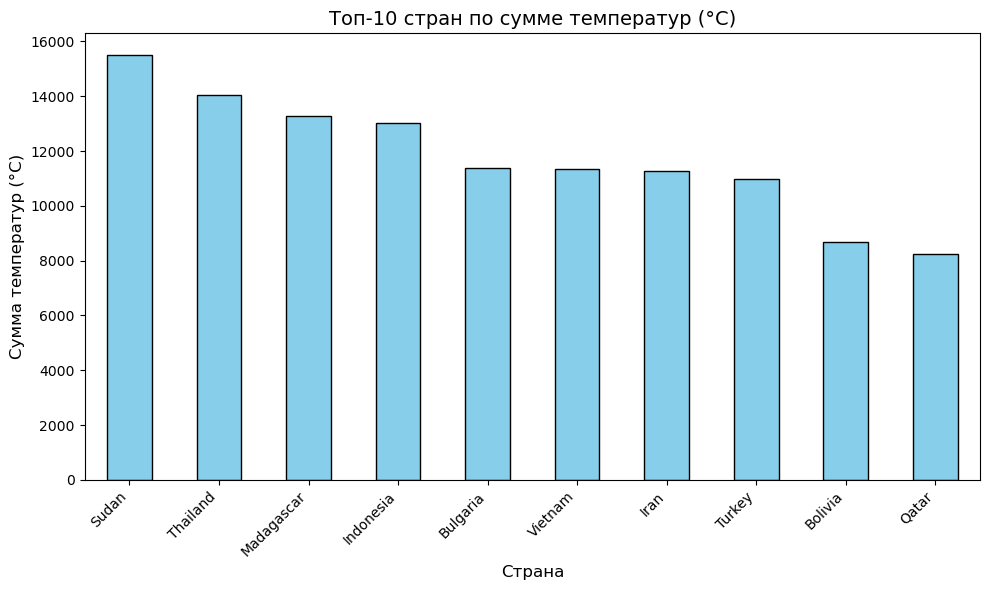

In [131]:
plt.figure(figsize=(10, 6))
df.groupby('country')['temperature_celsius'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', color='skyblue', edgecolor='black')
plt.title('Топ-10 стран по сумме температур (°C)', fontsize=14)
plt.ylabel('Сумма температур (°C)', fontsize=12)
plt.xlabel('Страна', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Тенденции:
Некоторые страны демонстрируют значительно более высокие суммарные значения температуры или влажности по сравнению с другими. Это может быть связано с их географическим положением (например, тропический или пустынный климат).

Выводы:
Лидеры по суммарным значениям могут быть регионами с экстремальными климатическими условиями, такими как высокая влажность или жара.

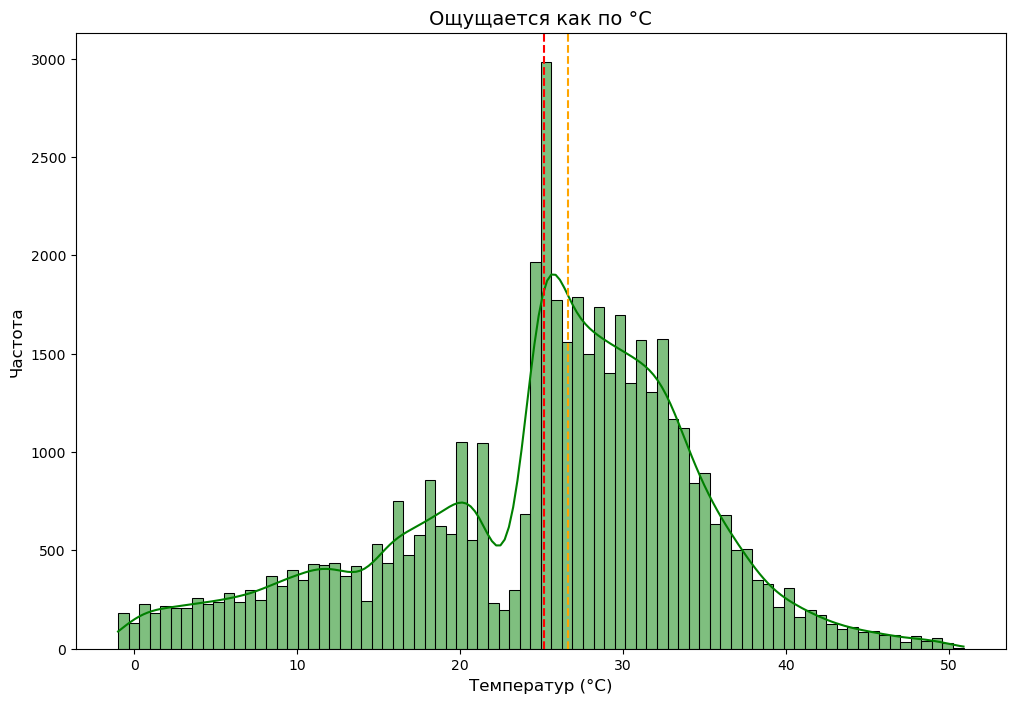

In [133]:
plt.figure(figsize=(12, 8))

sns.histplot(df['feels_like_celsius'], kde=True, color='green')
plt.title('Ощущается как по °C', fontsize=14)
plt.xlabel('Температур (°C)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.axvline(df['feels_like_celsius'].median(), color='orange', linestyle='--', label='Медиана')
plt.axvline(df['feels_like_celsius'].mean(), color='red', linestyle='--', label='Среднее')


plt.show()

Тенденции:
Форма распределения: Если гистограмма симметрична, температура ощущается равномерно. Смещение влево или вправо указывает на доминирование низких или высоких температур соответственно.

Медиана и среднее значение: Если медиана и среднее близки, распределение сбалансировано. Различие между ними может указывать на экстремальные значения, которые смещают среднее.

Ширина распределения: Широкая гистограмма показывает разнообразие температурных ощущений, а острые пики могут свидетельствовать о преобладании определенных температур.

Выводы:
Если среднее значительно выше медианы, это может указывать на наличие экстремальных высоких температур. В целом, данные могут показывать сбалансированное или смещенное распределение температур по ощущениям.

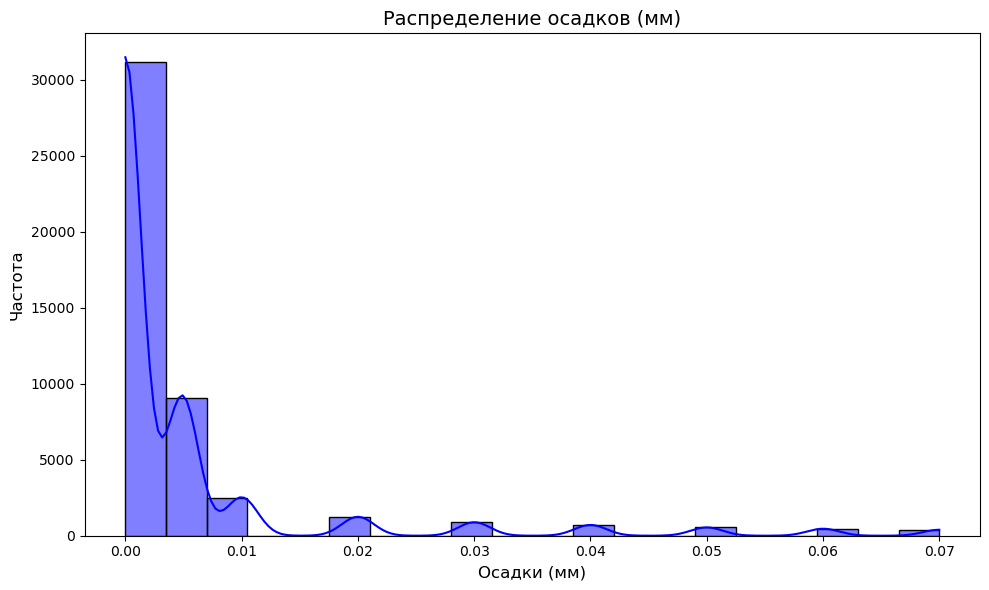

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(df['precip_mm'], bins=20, kde=True, color='blue')
plt.title('Распределение осадков (мм)', fontsize=14)
plt.xlabel('Осадки (мм)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции:
Большая часть значений температуры и осадков сосредоточена вокруг средних показателей.
Линия KDE показала, что распределение близко к нормальному.

Выводы:
Выбросы в данных могут свидетельствовать об экстремальных климатических явлениях, таких как аномальная жара, засуха или сильные осадки.
Это распределение можно использовать для прогнозирования вероятности экстремальных погодных условий.

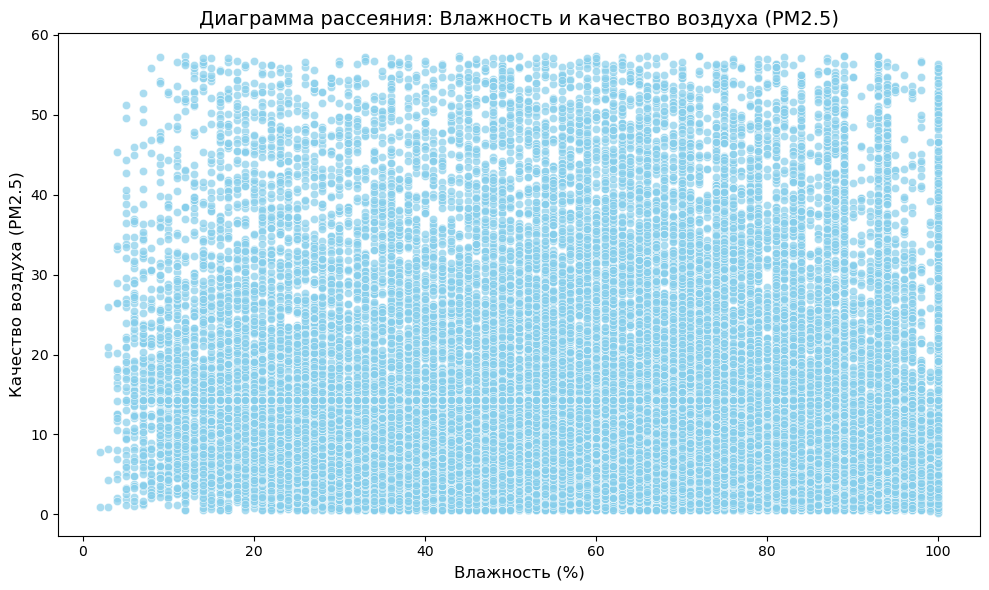

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='humidity', y='air_quality_PM2.5', color='skyblue', alpha=0.7)
plt.title('Диаграмма рассеяния: Влажность и качество воздуха (PM2.5)', fontsize=14)
plt.xlabel('Влажность (%)', fontsize=12)
plt.ylabel('Качество воздуха (PM2.5)', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции:
Зависимость между влажностью и качеством воздуха также демонстрирует сложные отношения, где увеличение влажности может быть связано с более высоким содержанием PM2.5.

Выводы:
Эти зависимости могут быть полезны для изучения влияния климата на качество воздуха и комфортабельность условий проживания.



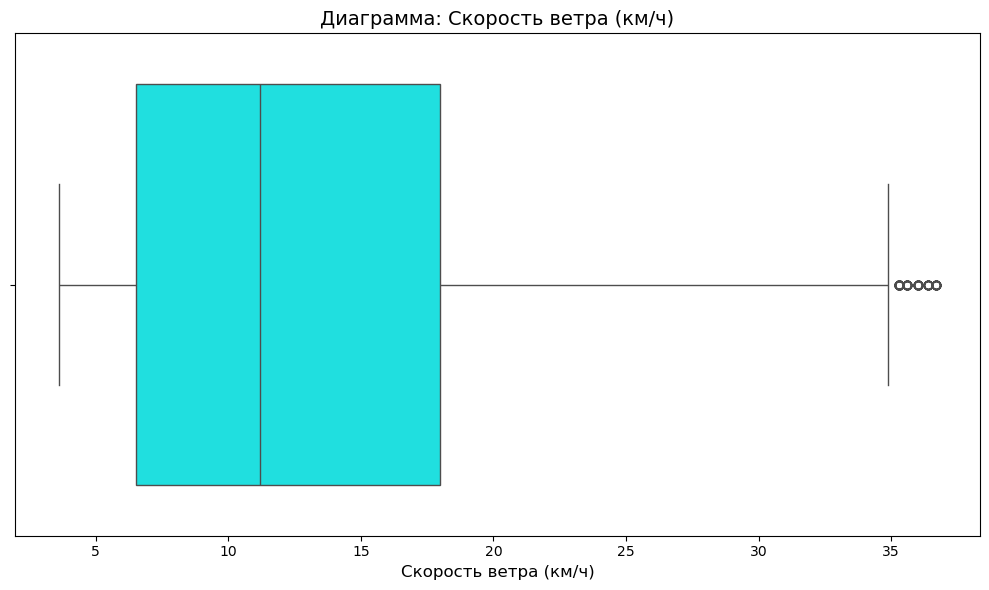

In [139]:
# Box Plot: Range and Outliers for temperature_celsius
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='wind_kph', color='cyan')
plt.title('Диаграмма: Скорость ветра (км/ч)', fontsize=14)
plt.xlabel('Скорость ветра (км/ч)', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции:
Диапазоны температур и скорости ветра подтверждают наличие значительных выбросов, которые могут быть вызваны экстремальными погодными условиями (например, сильные ветры или экстремальная жара).
Большая часть данных сосредоточена в узком диапазоне.

Выводы:
Выбросы могут быть следствием ошибок измерений или действительно экстремальных явлений. Их анализ важен для предотвращения рисков, связанных с этими условиями.
Данные помогут понять климатические особенности регионов и разработать стратегии адаптации.

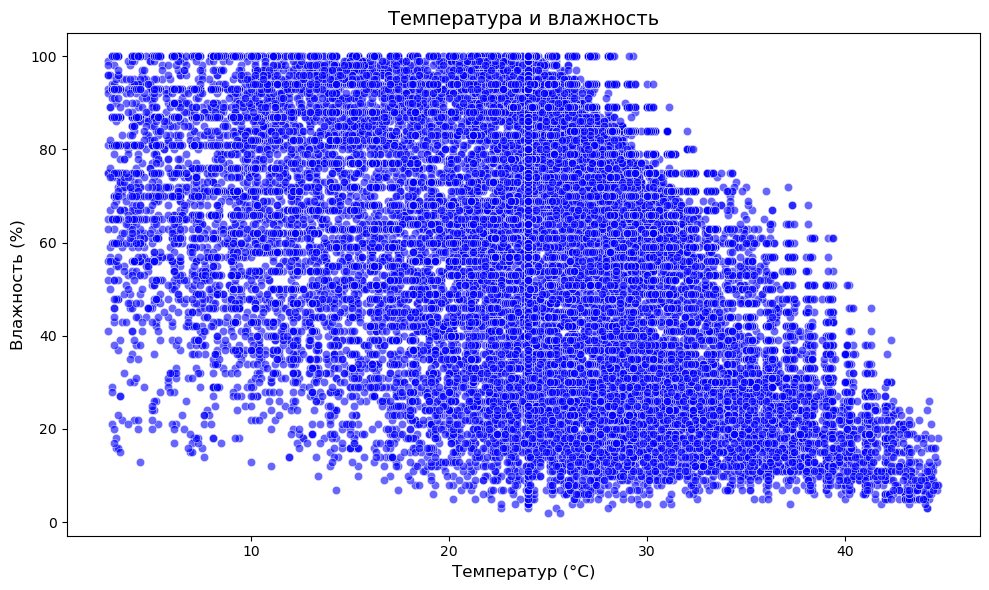

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='humidity', color='blue', alpha=0.6)
plt.title('Температура и влажность', fontsize=14)
plt.xlabel('Температур (°C)', fontsize=12)
plt.ylabel('Влажность (%)', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции: Зависимость между температурой и влажностью носит нелинейный характер: при экстремально высоких температурах влажность часто ниже, а при умеренных температурах — выше.

Выводы: Эти зависимости могут быть полезны для изучения влияния климата на качество воздуха и комфортабельность условий проживания.